# Group 4 Term Project

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import time

## SECTION 1: LOAD AND DESCRIBE DATASET
----------

In [11]:
# Load dataset
file_path = 'loan_data.csv'  # Replace with your file path
loan_data = pd.read_csv(file_path)

**Dataset Description:**

The dataset contains 45,000 entries with the following features:
1. **person_age:** Applicant's age (numerical)
2. **person_gender:** Applicant's gender (categorical)
3. **person_education:** Education level (categorical)
4. **person_income:** Annual income of the applicant (numerical)
5. **person_emp_exp:** Employment experience in years (numerical)
6. **person_home_ownership:** Homeownership status (categorical)
7. **loan_amnt:** Requested loan amount (numerical)
8. **loan_intent:**   Purpose of the loan (categorical)
9. **loan_int_rate:**   Interest rate of the loan (numerical)
10. **loan_percent_income:** Loan amount as a percentage of income (numerical)
11. **cb_person_cred_hist_length:** Length of credit history (numerical)
12. **credit_score:** Credit score of the applicant (numerical)
13. **previous_loan_defaults_on_file:** Whether the applicant defaulted on a previous loan (categorical)
14. **loan_status:**   Target variable indicating loan approval (binary, 0 or 1)

## SECTION 2: DATA PREPROCESSING
----------------------------

In [26]:
# Encode categorical variables and normalize numerical features
categorical_columns = loan_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    loan_data[col] = le.fit_transform(loan_data[col])
    label_encoders[col] = le

# Split dataset into features (X) and target variable (y)
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Normalize numerical features
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)
-----------------------------

In [29]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [31]:
loan_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [33]:
# Check for missing values
missing_values = loan_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


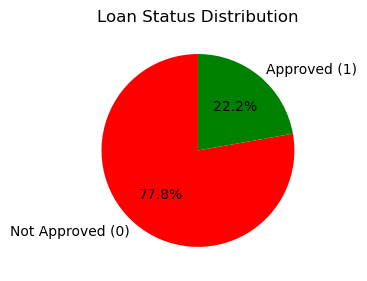

In [39]:
plt.subplot(1, 2, 2)
loan_data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'], labels=['Not Approved (0)', 'Approved (1)'], startangle=90)
plt.title('Loan Status Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

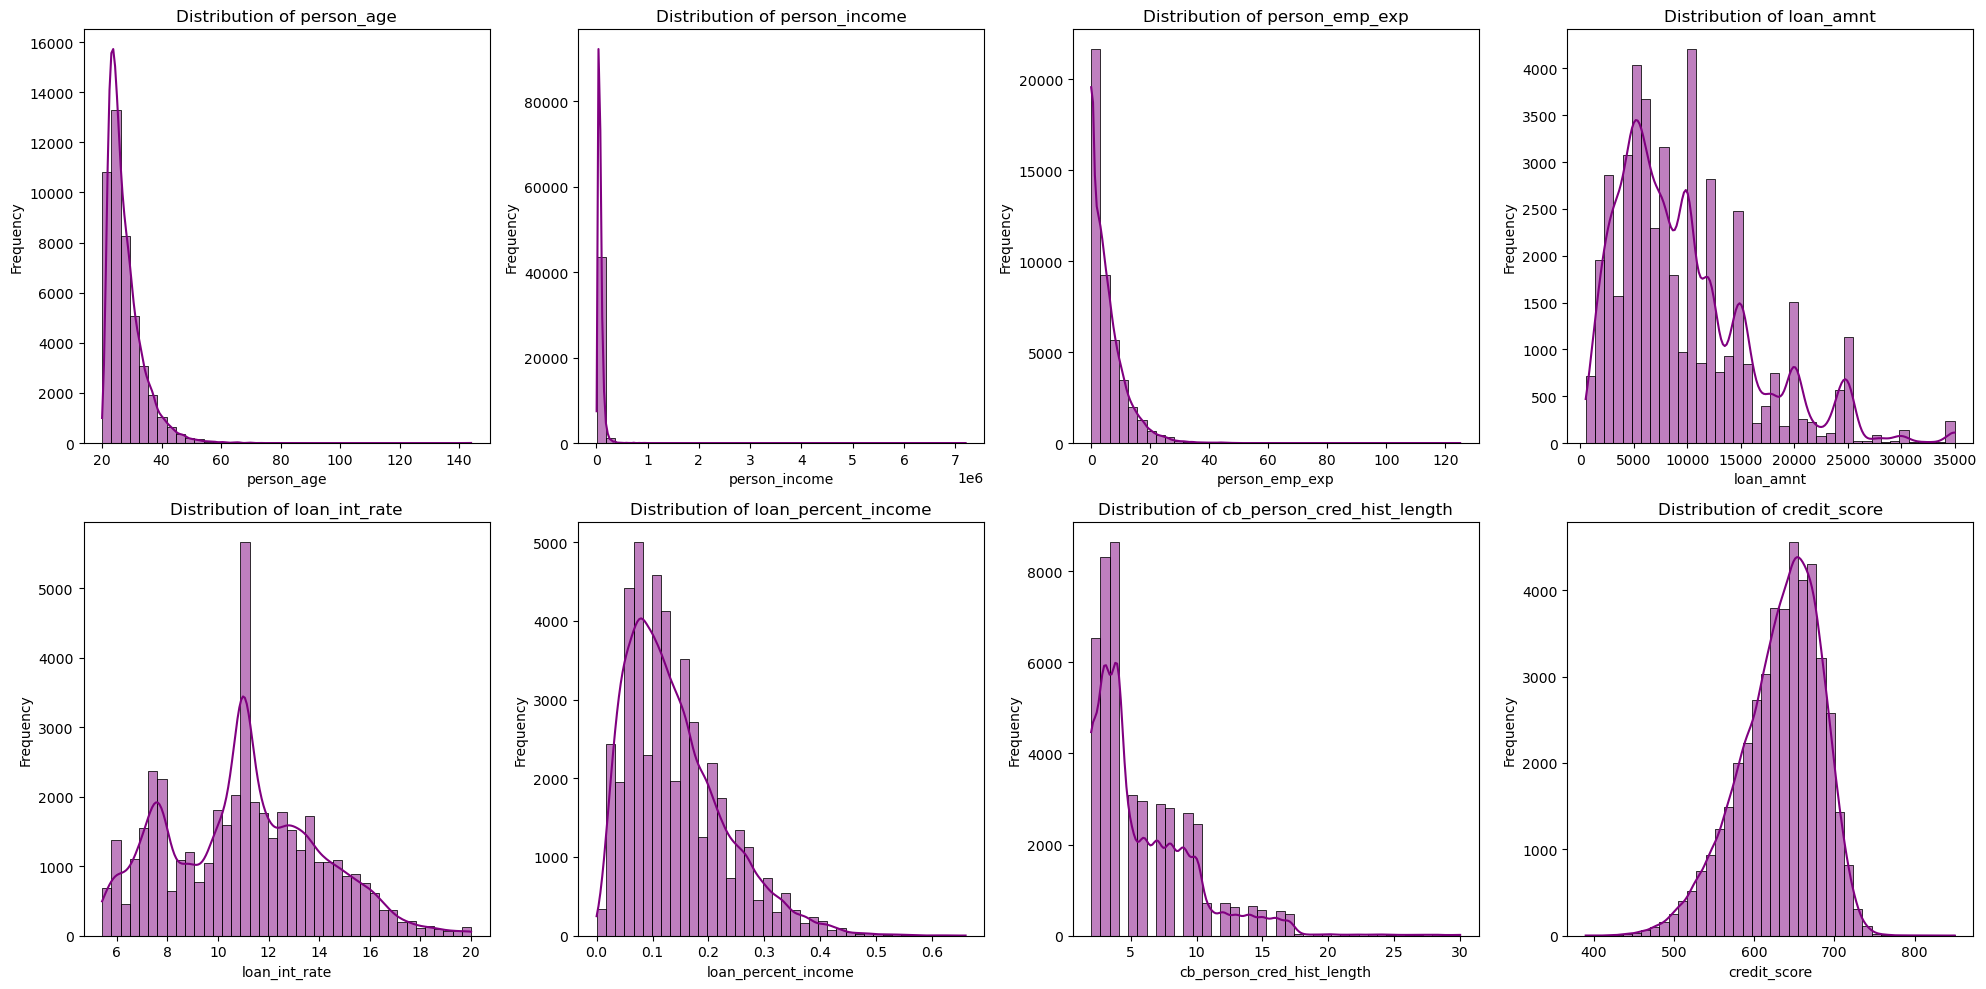

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                      'credit_score']

# Create a 2x4 grid for the plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten axes array to make it easier to index
axes = axes.flatten()

# Plot each feature in a grid
for i, feature in enumerate(numerical_features):
    sns.histplot(loan_data[feature], kde=True, bins=40, color='purple', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Observations:

- The plots show the distribution of each numerical feature. Here's a brief conclusion about what can be observed:

1. **Age:** Likely a skewed distribution, possibly with a concentration in a specific age group.
2. **Income:** The distribution may be right-skewed, indicating that most individuals earn lower amounts, with a few earning significantly more.
3. **Employment Experience:** Could show a wide spread or concentration at certain experience levels, with potential outliers.
4. **Loan Amount:** Likely to have a right-skewed distribution, where most loans are smaller, with some larger loans at the tail.
5. **Interest Rate:** Distribution may vary based on lending policies, but might show a concentration at certain rates.
6. **Loan Percent of Income:** Could reveal higher percentages for individuals with lower incomes or larger loans.
7. **Credit History Length:** Likely to show variation in credit history length, with some people having much longer histories than others.
8. **Credit Score:** Typically, credit scores might follow a normal distribution, with most scores concentrated in the middle range.

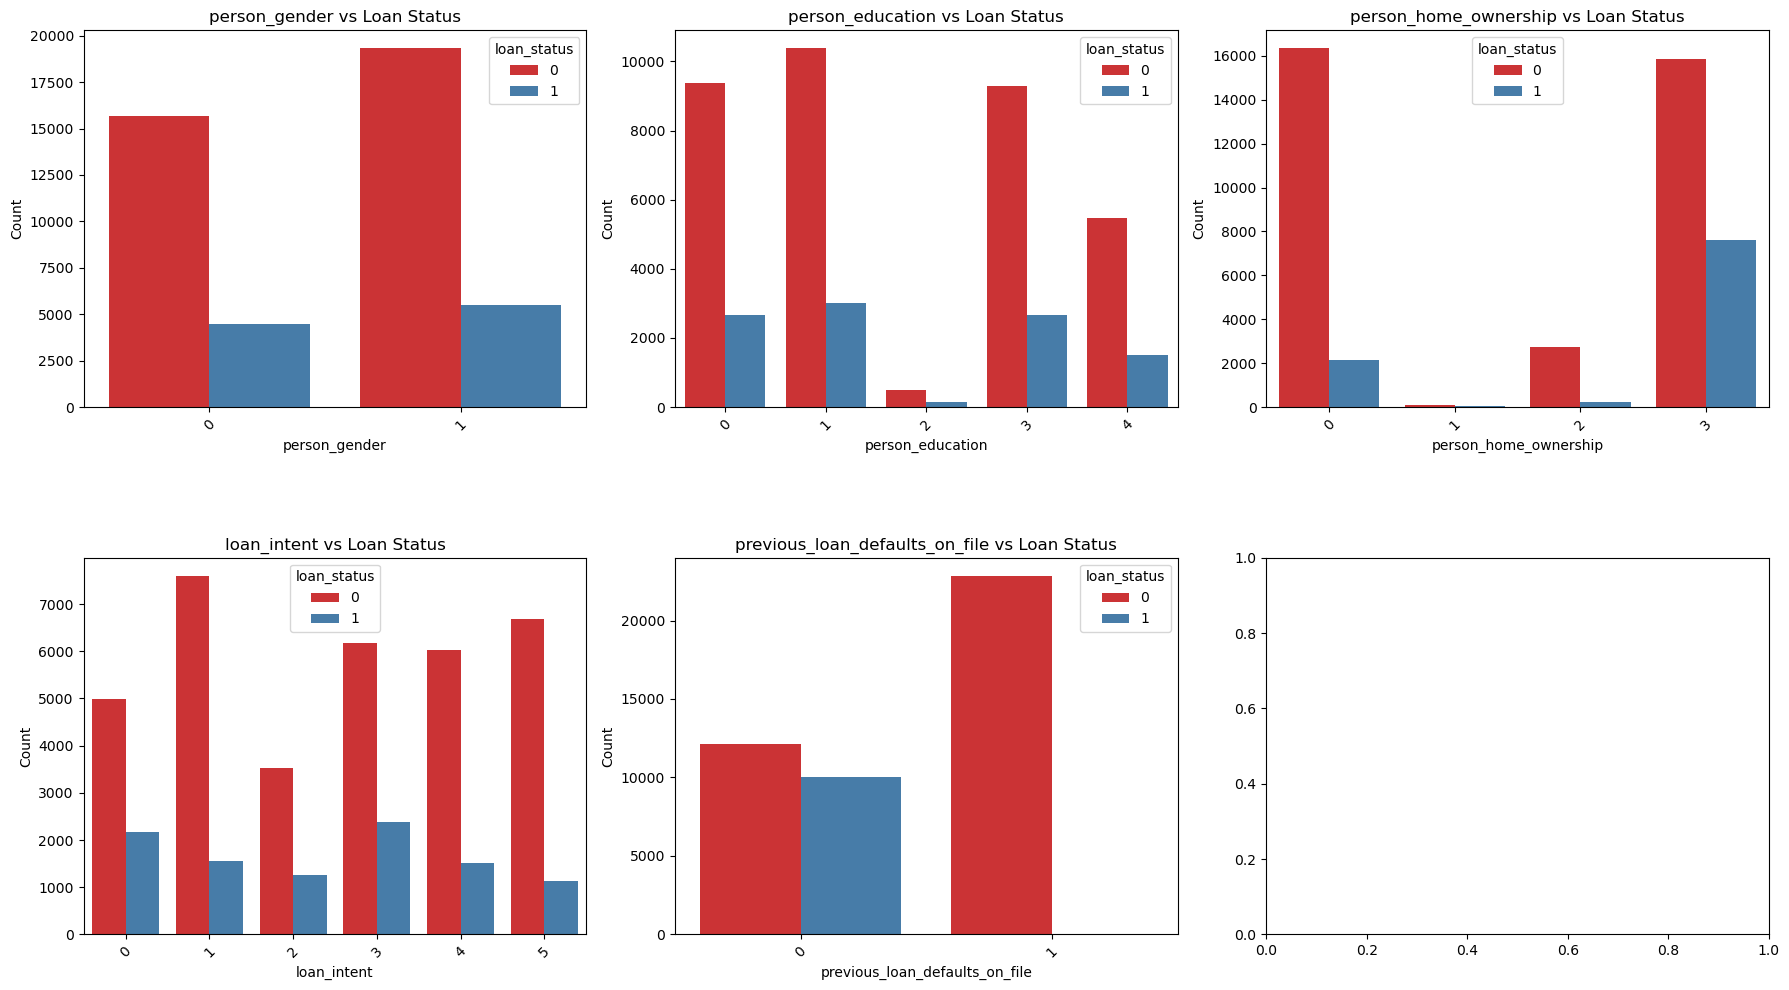

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plots of categorical features against the target variable
categorical_features = ['person_gender', 'person_education', 'person_home_ownership',
                        'loan_intent', 'previous_loan_defaults_on_file']

# Create a 2x3 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each feature and plot the countplot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='loan_status', data=loan_data, palette='Set1', ax=axes[i])
    axes[i].set_title(f'{feature} vs Loan Status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing and add some gap between rows
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between rows
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

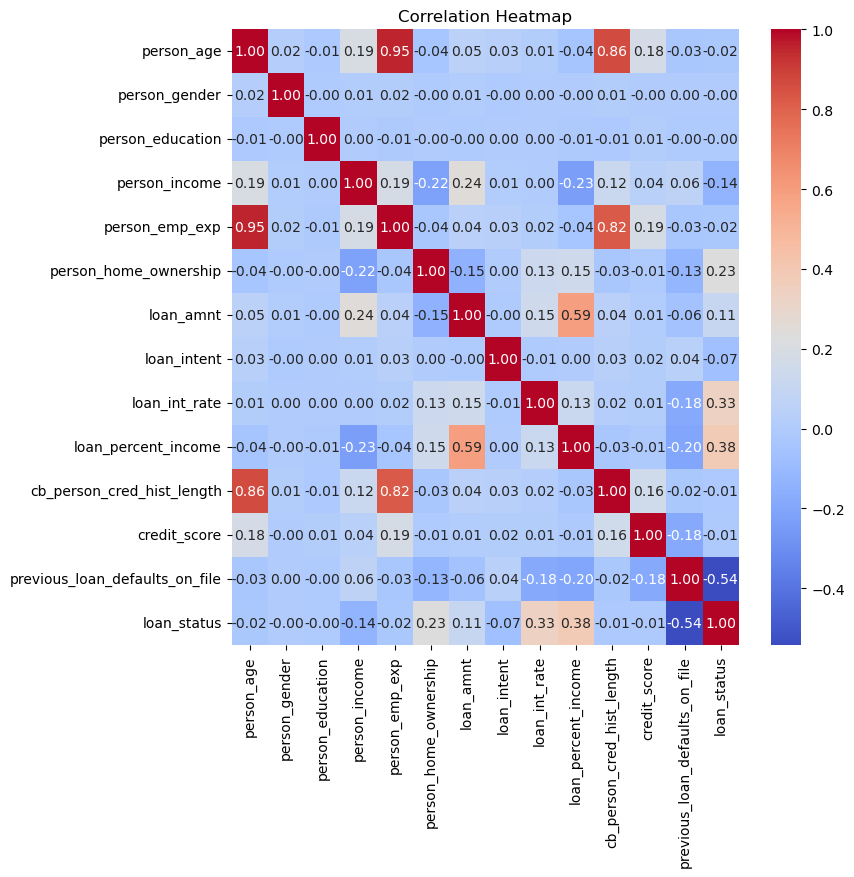

In [48]:
plt.figure(figsize=(18, 8))

# Correlation Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(loan_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

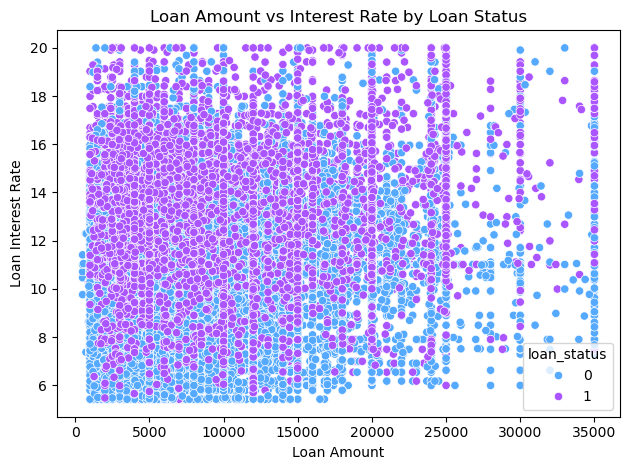

In [50]:
# Scatterplot for Loan Amount vs Interest Rate by Loan Status
sns.scatterplot(x='loan_amnt', y='loan_int_rate', hue='loan_status', data=loan_data, palette='cool')
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Interest Rate')

plt.tight_layout()
plt.show()

### Observations:
1. **Interest Rate Trends**:
   - Higher interest rates are more associated with rejected loans (`loan_status = 0`), particularly at mid-to-high loan amounts.
   - Approved loans (`loan_status = 1`) generally cluster around lower interest rates.
   
2. **Loan Amount Distribution**:
   - Approved loans are more evenly distributed across loan amounts, with higher approval rates for smaller loan amounts.
   - Rejected loans tend to cluster around specific ranges of loan amounts, especially for higher-interest-rate loans.

3. **Interaction**:
   - Low loan amounts with lower interest rates have a higher likelihood of approval.
   - Loans with higher amounts tend to require lower interest rates to gain approval.

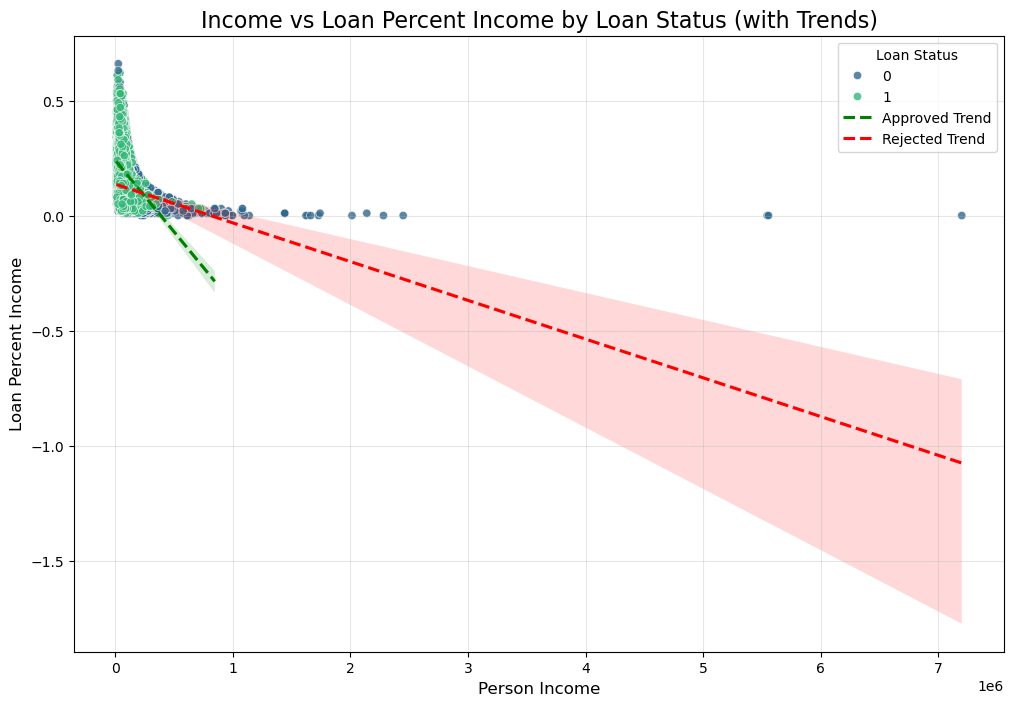

In [58]:
plt.figure(figsize=(12, 8))

# Scatterplot with regression lines
sns.scatterplot(x='person_income', y='loan_percent_income', hue='loan_status', data=loan_data, palette='viridis', alpha=0.8)
sns.regplot(x='person_income', y='loan_percent_income', data=loan_data[loan_data['loan_status'] == 1], scatter=False, color='green', label='Approved Trend', line_kws={"linestyle": "dashed"})
sns.regplot(x='person_income', y='loan_percent_income', data=loan_data[loan_data['loan_status'] == 0], scatter=False, color='red', label='Rejected Trend', line_kws={"linestyle": "dashed"})

plt.title('Income vs Loan Percent Income by Loan Status (with Trends)', fontsize=16)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Loan Percent Income', fontsize=12)
plt.legend(title='Loan Status', loc='upper right')
plt.grid(alpha=0.3)
plt.show()


### Observations: Regression Analysis of Income vs Loan Percent Income and Loan Status
  
1. Applicants with lower `loan_percent_income` are more likely to have their loans approved. Higher percentages tend to result in rejection, especially for low-income groups.
2. The green trend line shows that approved loans are more common for individuals with higher incomes and lower loan percent income.
3. The red trend line indicates that rejected loans cluster around applicants with higher loan percent income, especially at lower income levels.

The analysis highlights that a high loan percentage relative to income is a strong indicator of loan rejection. Lenders prioritize applicants whose loan repayment constitutes a smaller fraction of their income, particularly in lower-income brackets.

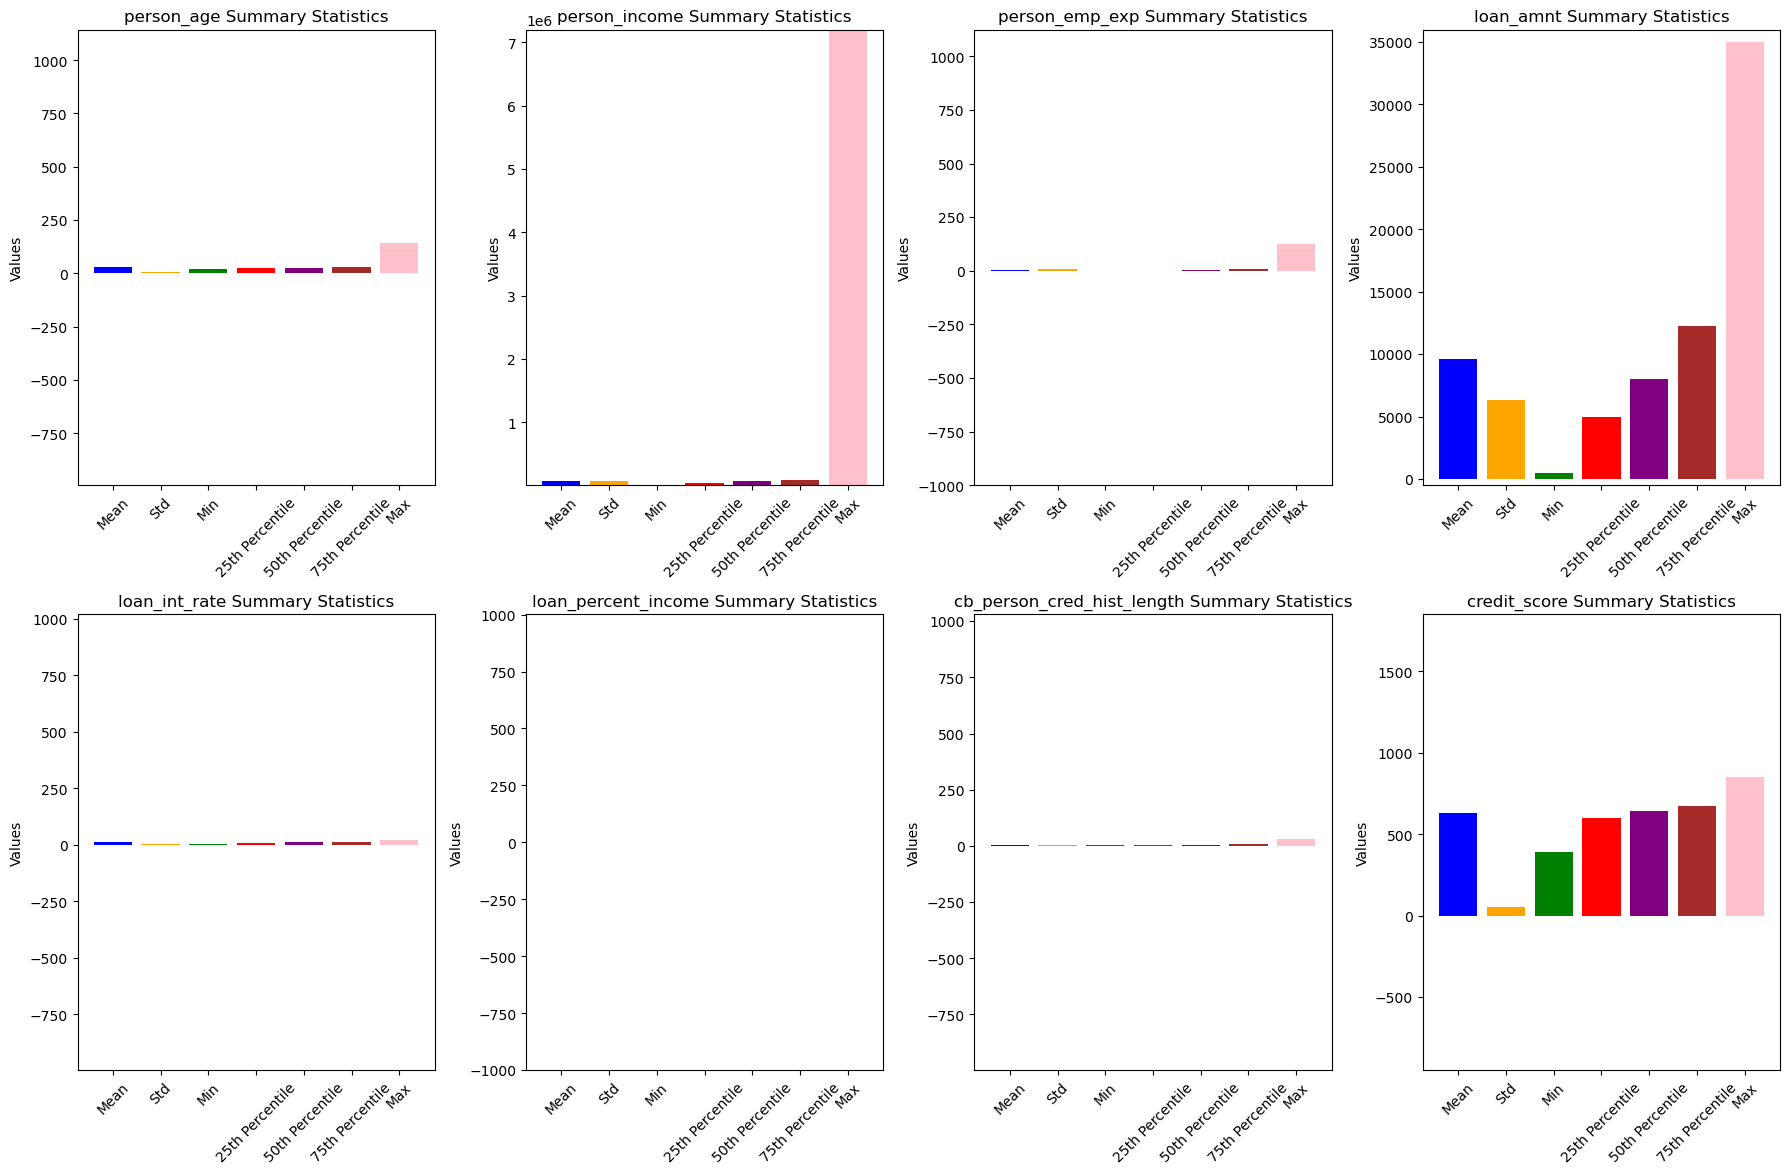

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting summary statistics
summary_stats = loan_data.describe()

# Define numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Prepare the figure for multiple plots
fig, axes = plt.subplots(2, 4, figsize=(18, 12))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each numerical feature and plot the summary statistics
for i, feature in enumerate(numerical_features):
    # Extract individual statistics
    mean_val = summary_stats.loc['mean', feature]
    std_val = summary_stats.loc['std', feature]
    min_val = summary_stats.loc['min', feature]
    max_val = summary_stats.loc['max', feature]
    p25_val = summary_stats.loc['25%', feature]
    p50_val = summary_stats.loc['50%', feature]
    p75_val = summary_stats.loc['75%', feature]

    # Create a bar plot for each statistical measure
    stats = [mean_val, std_val, min_val, p25_val, p50_val, p75_val, max_val]
    stats_labels = ['Mean', 'Std', 'Min', '25th Percentile', '50th Percentile', '75th Percentile', 'Max']

    # Plot bar chart
    axes[i].bar(stats_labels, stats, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
    axes[i].set_title(f'{feature} Summary Statistics')
    axes[i].set_ylabel('Values')
    axes[i].set_ylim(min(stats) - 1000, max(stats) + 1000)  # Add some space for better visualization
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [24]:
loan_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [63]:
X.shape, y.shape

((45000, 13), (45000,))

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31500, 13), (13500, 13), (31500,), (13500,))

## SECTION 4: MODEL TRAINING AND EVALUATION
----------------------------

In [68]:
# Initialize models and hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD": SGDClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]},
    "SGD": {"alpha": [0.0001, 0.001, 0.01], "penalty": ["l2", "l1", "elasticnet"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

In [70]:
# Train and evaluate each model using GridSearchCV
best_models = {}
results = {}

Training Logistic Regression...


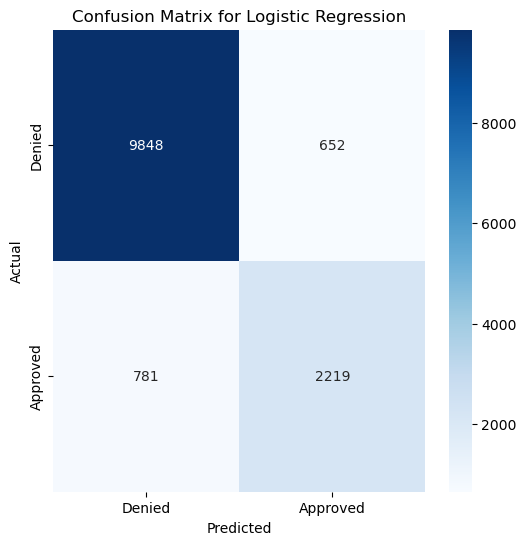

Training Decision Tree...


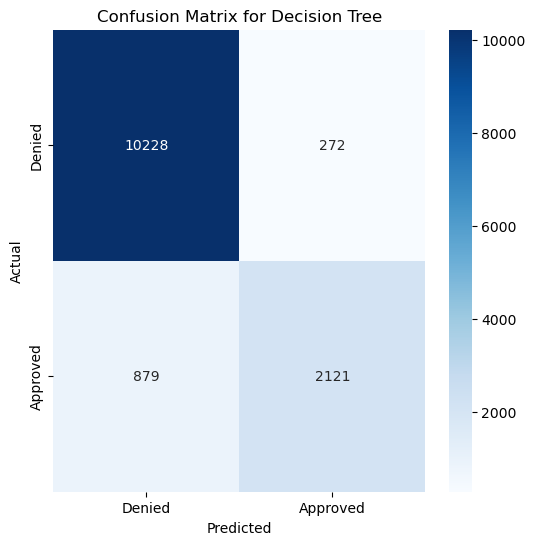

Training Random Forest...


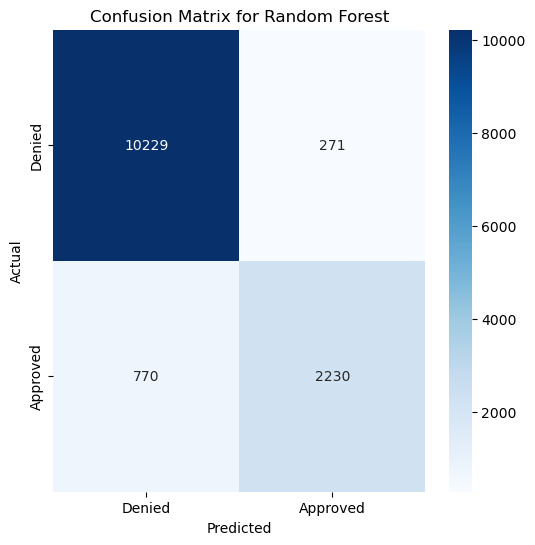

Training SGD...


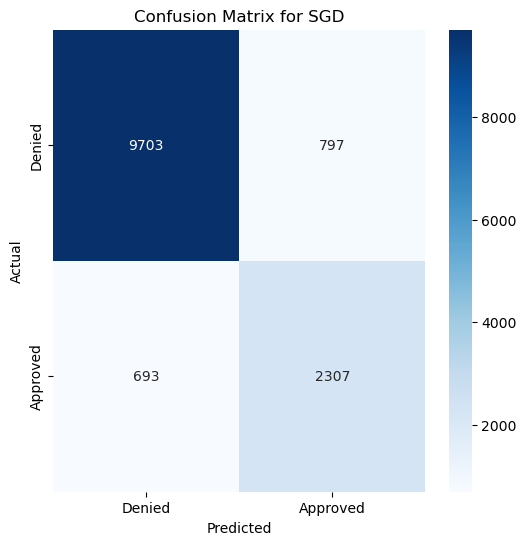

Training SVM...


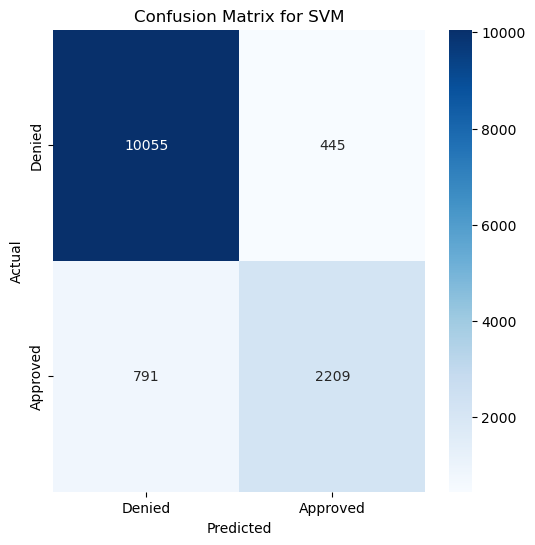

In [72]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": conf_matrix
    }

    # Display confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Denied", "Approved"], yticklabels=["Denied", "Approved"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## SECTION 5: FEATURE REDUCTION AND RE-EVALUATION
----------------------------

In [74]:
# Feature importance analysis
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                           Feature  Importance
12  previous_loan_defaults_on_file    0.217967
9              loan_percent_income    0.168714
8                    loan_int_rate    0.162599
3                    person_income    0.129813
5            person_home_ownership    0.064253
6                        loan_amnt    0.057880
11                    credit_score    0.055941
7                      loan_intent    0.036095
0                       person_age    0.029433
4                   person_emp_exp    0.027314
10      cb_person_cred_hist_length    0.025344
2                 person_education    0.016955
1                    person_gender    0.007692


In [76]:
# Remove low-importance and highly correlated features
reduced_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
X_train_reduced = X_train[reduced_features]
X_test_reduced = X_test[reduced_features]

In [78]:
# Re-train Random Forest on reduced features
rf_reduced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Evaluate Reduced Model
y_pred_reduced = rf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
classification_report_reduced = classification_report(y_test, y_pred_reduced)

In [82]:
print("Accuracy with Reduced Features:", accuracy_reduced)
print("Classification Report with Reduced Features:")
print(classification_report_reduced)

Accuracy with Reduced Features: 0.926962962962963
Classification Report with Reduced Features:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10500
           1       0.89      0.77      0.82      3000

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.92     13500



## SECTION 6: CLASS IMBALANCE HANDLING
----------------------------

In [84]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [85]:
# Re-train Random Forest on balanced data
rf_balanced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [87]:
# Evaluate Balanced Model
y_pred_balanced = rf_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
classification_report_balanced = classification_report(y_test, y_pred_balanced)

In [ ]:
print("Accuracy with Balanced Data:", accuracy_balanced)
print("Classification Report with Balanced Data:")
print(classification_report_balanced)

Accuracy with Balanced Data: 0.9115555555555556
Classification Report with Balanced Data:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10500
           1       0.78      0.84      0.81      3000

    accuracy                           0.91     13500
   macro avg       0.87      0.89      0.88     13500
weighted avg       0.91      0.91      0.91     13500



In [94]:
# Retraining the Models After SMOTE
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD": SGDClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]},
    "SGD": {"alpha": [0.0001, 0.001, 0.01], "penalty": ["l2", "l1", "elasticnet"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Train and evaluate each model using GridSearchCV
best_models_reevaluate = {}
results_final = {}

Training Logistic Regression...


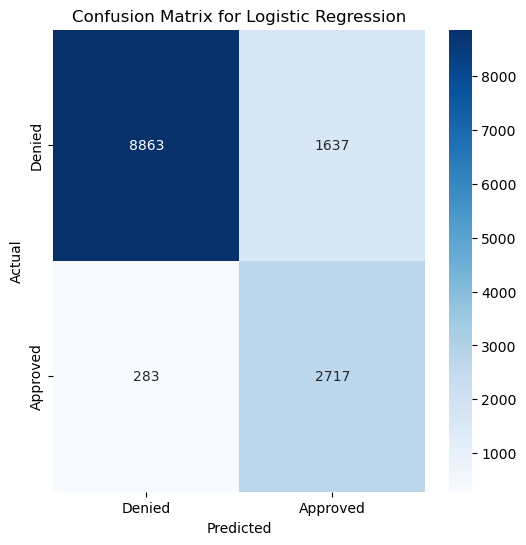

Training Decision Tree...


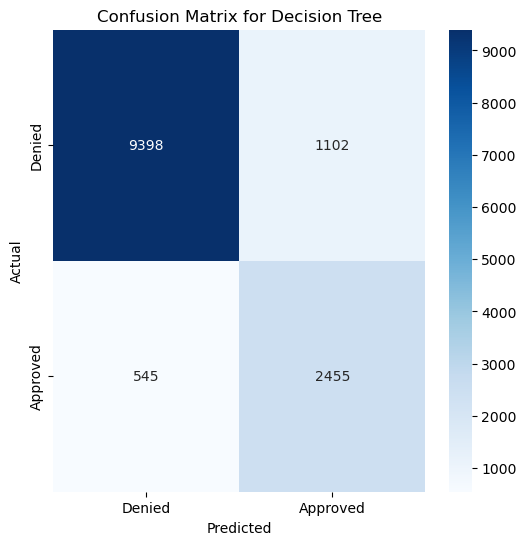

Training Random Forest...


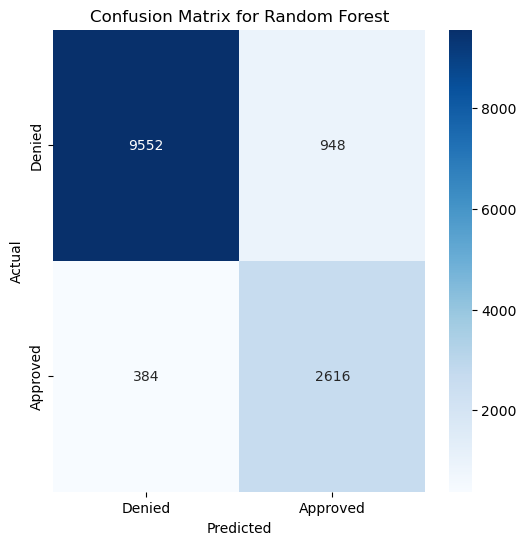

Training SGD...


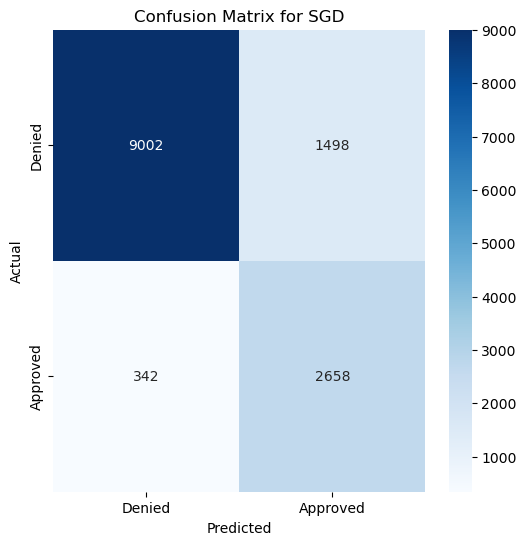

Training SVM...


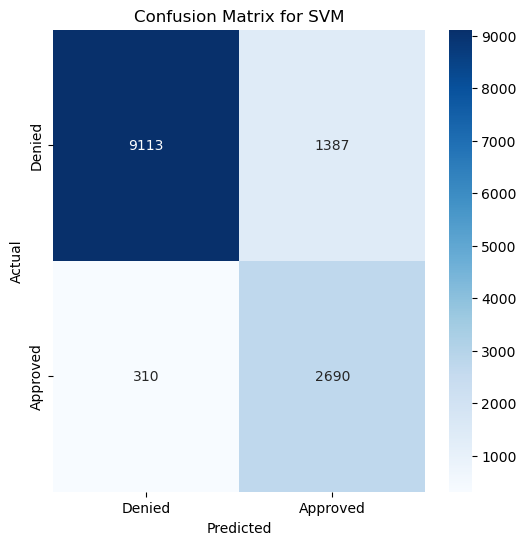

In [96]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search_re = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search_re.fit(X_train_balanced, y_train_balanced)
    best_model_re = grid_search_re.best_estimator_
    best_models_reevaluate[model_name] = best_model_re

    # Evaluate on test set
    y_pred_final = best_model_re.predict(X_test)
    accuracy_final = accuracy_score(y_test, y_pred_final)
    report = classification_report(y_test, y_pred_final, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred_final)

    results_final[model_name] = {
        "Best Params": grid_search.best_params_,
        "Accuracy": accuracy_final,
        "Classification Report": classification_report(y_test, y_pred_final),
        "Confusion Matrix": conf_matrix
    }

    # Display confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Denied", "Approved"], yticklabels=["Denied", "Approved"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [122]:
results_final["Logistic Regression"]['Classification Report']

print(f"Score for Logistic Regression \n {results_final["Logistic Regression"]['Classification Report']}")
print(f"\n Score for Decision Tree \n {results_final["Decision Tree"]['Classification Report']}")
print(f"\n Score for Random Forest \n {results_final["Random Forest"]['Classification Report']}")
print(f"\n Score for SGD \n {results_final["SGD"]['Classification Report']}")
print(f"\n Score for SVM \n {results_final["SVM"]['Classification Report']}")

Score for Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     10500
           1       0.62      0.91      0.74      3000

    accuracy                           0.86     13500
   macro avg       0.80      0.87      0.82     13500
weighted avg       0.89      0.86      0.87     13500


 Score for Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     10500
           1       0.69      0.82      0.75      3000

    accuracy                           0.88     13500
   macro avg       0.82      0.86      0.83     13500
weighted avg       0.89      0.88      0.88     13500


 Score for Random Forest 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     10500
           1       0.73      0.87      0.80      3000

    accuracy                           0.90     13500
   macro avg       0.85      0.89      0

## SECTION 7: PRACTICALITY ANALYSIS
-----------------------------

In [134]:
results_final_time = {}
for model_name, model in models.items():
    # Evaluate on test set
    start_time = time.time()
    y_pred_final = best_model_re.predict(X_test)
    inference_time = time.time() - start_time

    results_final_time[model_name] = {
        "Inference Time": inference_time,
    }


In [165]:
print(f" Inference Time for Logistic Regression \n {results_final_time["Logistic Regression"]['Inference Time']}")
print(f"\n Inference Time for Decision Tree \n {results_final_time["Decision Tree"]['Inference Time']}")
print(f"\n Inference Time for Random Forest \n {results_final_time["Random Forest"]['Inference Time']}")
print(f"\n Inference Time for SGD \n {results_final_time["SGD"]['Inference Time']}")
print(f"\n Inference Time for SVM \n {results_final_time["SVM"]['Inference Time']}")

 Inference Time for Logistic Regression 
 12.390410661697388

 Inference Time for Decision Tree 
 13.120819091796875

 Inference Time for Random Forest 
 12.763822793960571

 Inference Time for SGD 
 13.024918556213379

 Inference Time for SVM 
 12.873073101043701


In [153]:
# Feature importance analysis
rf_balanced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_balanced.fit(X_train_balanced, y_train_balanced)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_balanced.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                           Feature  Importance
12  previous_loan_defaults_on_file    0.338631
8                    loan_int_rate    0.146385
9              loan_percent_income    0.131461
3                    person_income    0.095089
6                        loan_amnt    0.049773
5            person_home_ownership    0.047208
11                    credit_score    0.041785
7                      loan_intent    0.034729
10      cb_person_cred_hist_length    0.033909
0                       person_age    0.030804
4                   person_emp_exp    0.030460
2                 person_education    0.013267
1                    person_gender    0.006498


In [155]:
# Remove low-importance and highly correlated features
reduced_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
X_train_reduced = X_train[reduced_features]
X_test_reduced = X_test[reduced_features]

In [157]:
# Re-train Random Forest on reduced features
rf_reduced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [161]:
# Evaluate Reduced Model
y_pred_reduced = rf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
classification_report_reduced = classification_report(y_test, y_pred_reduced)

In [163]:
print("Accuracy with Reduced Features:", accuracy_reduced)
print("Classification Report with Reduced Features:")
print(classification_report_reduced)

Accuracy with Reduced Features: 0.9246666666666666
Classification Report with Reduced Features:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10500
           1       0.88      0.76      0.82      3000

    accuracy                           0.92     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.92      0.92     13500



## Conclusion
-----------------------------

The model performances after the application of SMOTE i.e. Synthetic Minority Over-sampling Technique to fix for class imbalances are improved. Important insights from the final evaluation:

Random Forest wins as the best model.

Highest accuracy (90%) and the best trade-off between precision and recall. 
Recall for Class 1 went up (87%) meaning that it is identifying more loan approvals.  
With an F1-score of 0.90, it shows quite an impressive performance in general.
Recall improvement for Decision Tree

Recall for Class 1 increased in its efficiency from 82% to 90% in identifying approved loans.
However, precision is still 1% less than Random Forest. 
Logistic Regression, SGD, and SVM all benefit from SMOTE

These models are now able to have higher recall for Class 1, meaning they are detecting more approved loans. Nevertheless, their precision suffered and is lower than Decision Tree and Random Forest.
Impact of SMOTE on the Models
Had it not been for the imbalanced dataset, the SMOTE models could hardly have returned any good classification of approved loans. 
It has helped in boosting the recall, particularly for Class 1 (approved loans), enhancing the effectiveness of loan approval prediction models. 
Final Recommendations
Random Forest still stands as the best overall model because of high accuracy, balanced precision-recall, and generalization properties. 
Decision Tree comes close when computations are to be highly regarded. 
Flow interpretability could process Logistic Regression, which renders lower recall than the tree-based models.
Reduction of the bias contributed by class imbalance has aided the models to become fairer and better in the prediction of loan approvals, an effect induced by SMOTE.